# Simulation from a Beta–Binomial Distribution

The Beta-Binominal($n, \alpha, \beta$) distribution is a discrete distribution generated by choosing the probability p for a binomial(n, p) distribution from a beta(α, β) distribution, then the marginal distribution of $X$ on the state space $ S = \{ 0,1,2,\ldots \}$. PMF of beta is
$$
    P(x) = \frac{ \Gamma(\alpha + \beta) }{ \Gamma(\alpha)\Gamma(\beta) } {n\choose x} \int_0^1 p^{x-\alpha-1}(1-p)^{n-x+\beta-1}dp
$$
$$
P(x) = \frac{ \Gamma(\alpha + \beta) }{ \Gamma(\alpha)\Gamma(\beta) } {n\choose x} \frac{ \Gamma(x+\alpha)\Gamma(n-x+\beta) }{ \Gamma(n+\alpha+\beta) } 
$$
$x = 0, 1, 2, 3, \ldots$

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
from scipy.special import comb
import seaborn as sns

%matplotlib inline

FIGSIZE = (9,6)
SAMPLESIZE = 100_000

In [67]:
N = 10
ALPHA = 7
BETA = 2

t_mean = (N * ALPHA) / (ALPHA + BETA)
t_variance = ((N * ALPHA * BETA) / (ALPHA + BETA) ** 2) * (
    (ALPHA + BETA + N) / (ALPHA + BETA + 1)
)
print(f"Theoritical\nMean: {t_mean}\nVariance: {t_variance}")

Theoritical
Mean: 7.777777777777778
Variance: 3.28395061728395


In [68]:
# pmf of Beta-Binomial Distribution without constant we call it target
def target(x, n=N, alpha=ALPHA, beta=BETA):
    return comb(n, x) * gamma(x + alpha) * gamma(n - x + beta)

In [64]:
# transition
def transition(current):
    return np.random.normal(current, 5)


# define accept
def acceptance(candidate, current) -> bool:
    return np.random.uniform(0, 1) < np.minimum(1, np.divide(candidate, current))


# define metropolic hesting algorithm
def MetropolisHestings(pdf, init_state, transition, acceptance, sample_size=SAMPLESIZE):
    current_state = init_state
    samples = []
    for _ in range(sample_size):
        candidate_state = transition(current_state)
        accept = acceptance(
            pdf(candidate_state) * transition(candidate_state),
            pdf(current_state) * transition(current_state),
        )
        if accept:
            current_state = candidate_state
        samples.append(current_state)
    return np.array(samples)

In [69]:
np.random.seed(0)

init_state = 7
sample = np.round(MetropolisHestings(target, init_state, transition, acceptance))

print(f"Experemental\nSample Mean: {np.mean(sample)}\nVariance: {np.var(sample)}")

Experemental
Sample Mean: 7.57322
Variance: 3.4167388316000005


Text(0.5, 0, 'Eheoretical: Mena = 7.7778, Variance = 3.2840\nEmpirical: Mena = 7.5732, Variance = 3.4167')

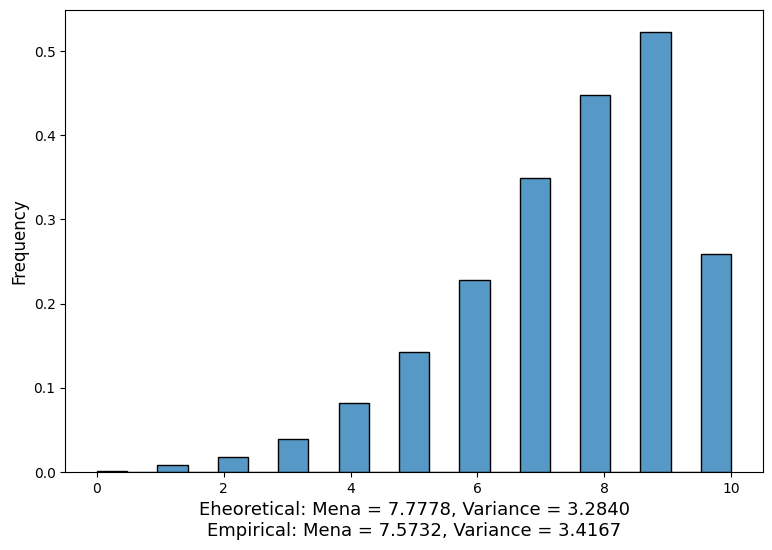

In [72]:
# ploting

plt.figure(figsize=FIGSIZE)
sns.histplot(sample, color="k", stat="density", bins=21)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel(
    f"Eheoretical: Mena = {t_mean:.4f}, Variance = {t_variance:.4f}\nEmpirical: Mena = {np.mean(sample):.4f}, Variance = {np.var(sample):.4f}",
    fontsize=13,
)